# This notebook is to evaluate different networks

# Table of contents
## <a href='#Evaluation-1:-Evaluate-the-whole-network-with-different-communities-by-changing-community-detection-parameters'>1. Evaluate whole network with different communities</a>
### <a href='#Evaluation-1.1:-how-do-#-genes-change-in-each-community-when-community-assingment-changes?'>1.1 How do # genes change in each community?</a>
### <a href='#Evaluation-1.2:-how-does-network-cluster-stability-change-when-community-assingment-changes?'>1.2 How do network cluster stability change?</a>
### <a href='#Evaluation-1.3:-how-do-%-DE-in-each-community-change-when-community-assingment-changes?'>1.3 How do % DE in each community change?</a>
### <a href='#Evaluation-1.4:-how-do-%-of-significant-genes-change-when-community-assingment-changes-(This-process-takes->10-min-to-run)'>1.4 How do significant gene % change with different community assignment</a>
### <a href='#Evaluation-1.5:-how-do-trait-and-community-correlation-change-when-community-assignment-change'>1.5 How do trait and community correlation change with different community assignment</a>
## <a href='#Evaluation-2:-Evaluate-subnetwork-quality-by-comparing-to-the-whole-network'>2. Evaluate subnetwork by comparing to the whole network</a>
### <a href='#Evaluation-2.1:-does-the-scale-free-network-assumption-still-hold-in-the-subnetwork?'>2.1 Does scale-free assumption still hold in the subnetwork</a>
### <a href='#Evaluation-2.2:-compare-network-distance-by-GED-and-deltacon'>2.2 Compare distance between networks</a>
## <a href='#Evaluation-3:-compare-subnetworks-by-their-communities'>3. Compare subnetwork communities</a>
### <a href='#Evaluation-3.1:-compare-subnetwork-similarities'>3.1 Compare communities of the subnetwork</a>
### <a href='#Evaluation-3.2:-how-do-the-subnetwork-communities-compare-to-the-whole-network-in-terms-of-correlation-with-the-alcohol-phenotypes?'> 3.2 How do the communities compare between whole and subnetworks functionally?</a>

In [1]:
import sys
sys.path.append("../..")

import pandas as pd
import time

from sys import platform 
from src.eda.eda_functions import *
from src.eda.subset_network import subset_network
from src.eda.process_phenotype import *
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
prefix = 'G:' if platform == 'win32' else '/Volumes/GoogleDrive'
start = time.time()
tom_df = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/Kapoor_TOM.csv', index_col = 0)
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')

time delta: 347.6353380680084 seconds


# Evaluation 1: Evaluate the whole network with different communities by changing community detection parameters

In [3]:
## read in the WGCNA modules (created in R) as the baseline with 1 setting only
wgcna_modules = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/eda_derived/wgcna_modules.csv')

In [4]:
# rename the columns, although wgcna used hclust, I renamed it as louvain so could compare with other louvain clusters
# wgcna_modules.rename(columns = {'Unnamed: 0':'id', 'x':'louvain_label'}, inplace = True)

In [5]:
# wgcna_modules.to_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/eda_derived/wgcna_modules.csv', index = 0)

In [6]:
# test with 2 sets of parameters (change resolution only)
start = time.time()
comm_df1 = run_louvain(tom_df, 1, -1) # default setting
comm_df2 = run_louvain(tom_df, 1, 1)
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')

time delta: 346.8098957538605 seconds


In [7]:
comm_df1.to_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/eda_derived/network_louvain_default.csv', index = 0)

In [8]:
# comm_df1 = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/eda_derived/network_louvain_default.csv', index_col = 0)

## Evaluation 1.1: how do # genes change in each community when community assingment changes?

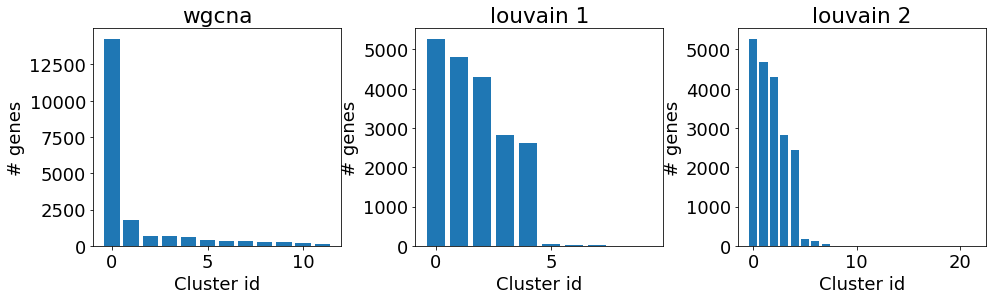

In [9]:
comm_dfs = [wgcna_modules,comm_df1, comm_df2]
comm_names = ['wgcna','louvain 1', 'louvain 2']
plot_gene_cnt_each_cluster(comm_dfs, 'louvain_label', comm_names)

## Evaluation 1.2: how does network cluster stability change when community assingment changes?

In [10]:
start = time.time()
cluster_pair_wgcna_n_com1, network_cluster_stability1 = network_cluster_stability(wgcna_modules, comm_df1, 'louvain_label')
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')

time delta: 385.4196639060974 seconds


### The histogram shows distribution for z scores for p value or correlation coefficient if the cluster membership is randomly assigned. The red vertical line is where the actual Z score is. For p value, the red line should be as left as possible for small p values for the actual cluster. For correlation coefficient, the red line should be either very left or very right to be very negatively correlated or very positively correlated for the actual cluster.

### Takes couple mins to run

time delta: 315.00358414649963 seconds


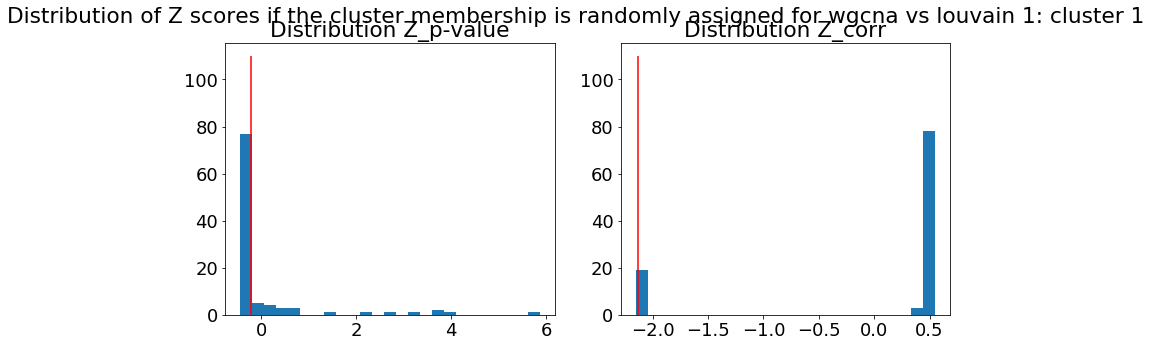

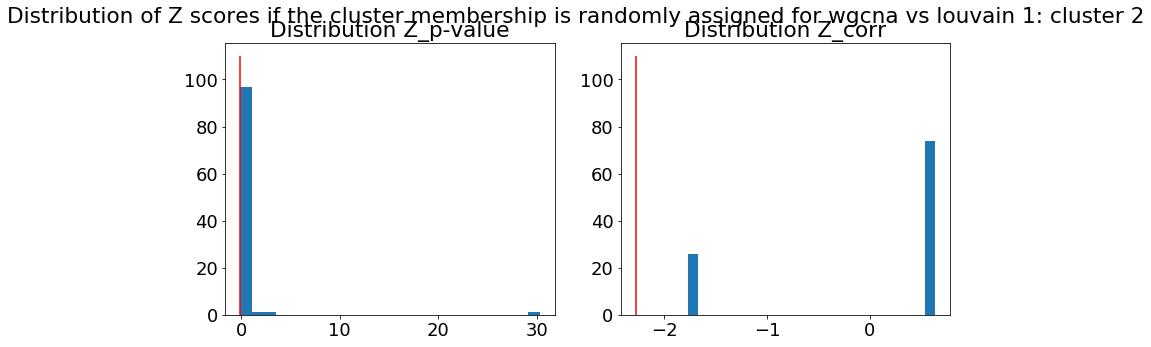

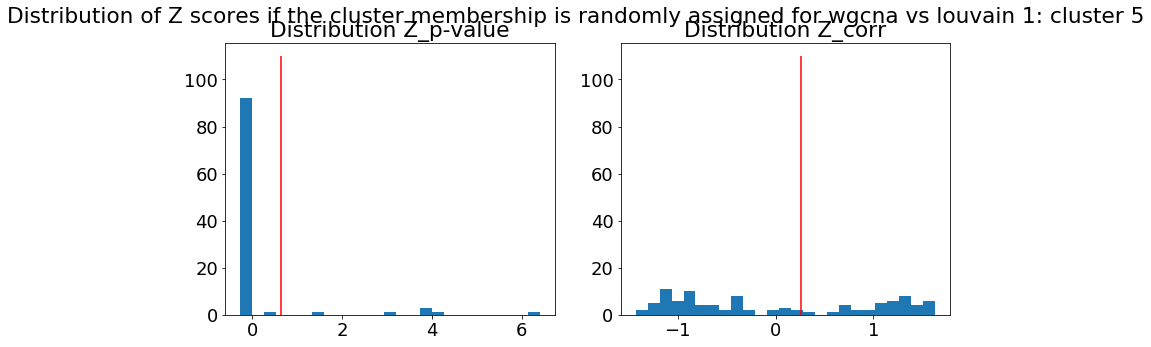

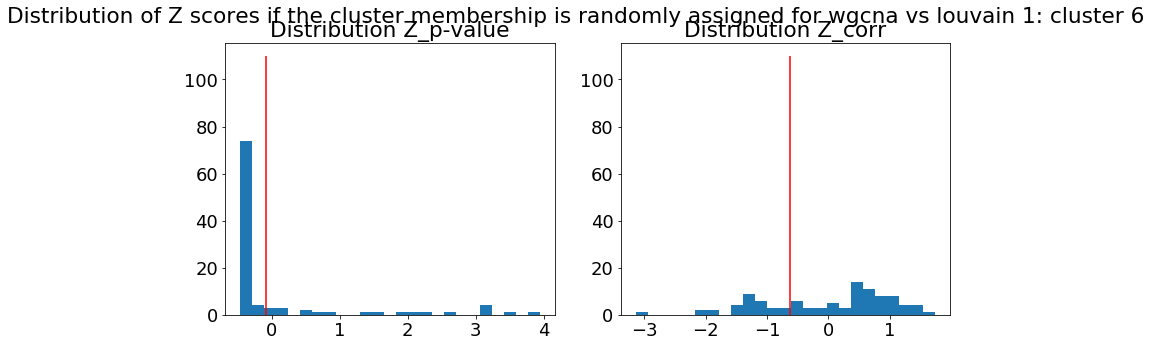

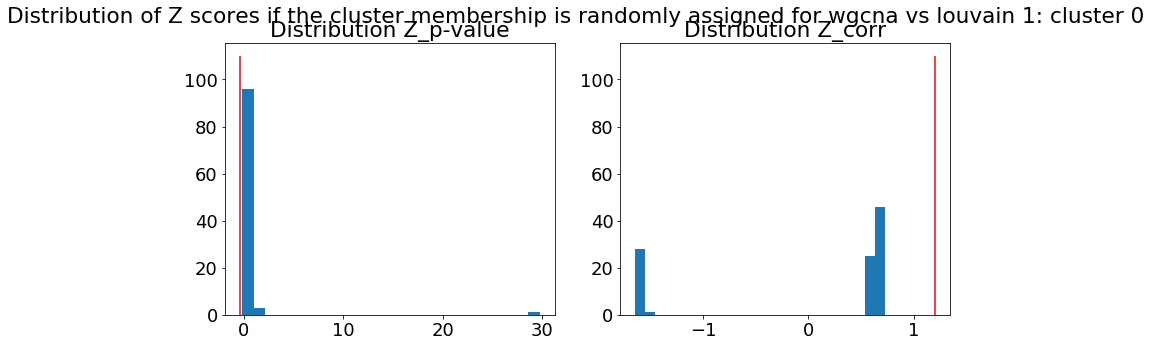

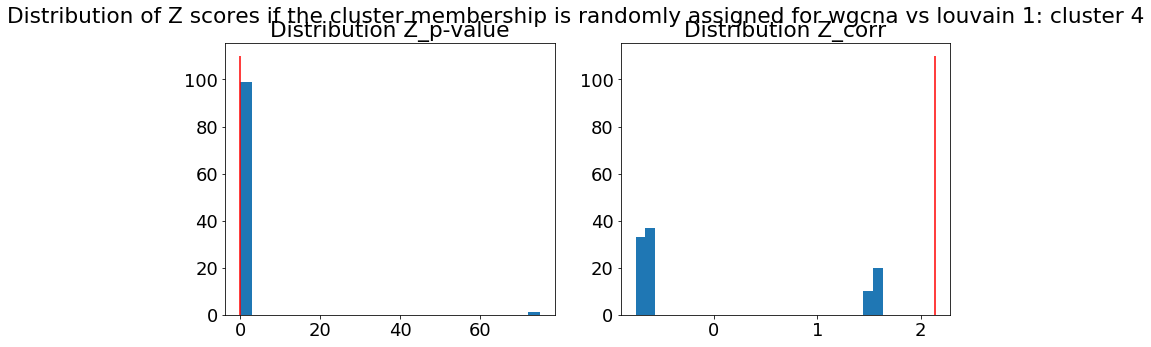

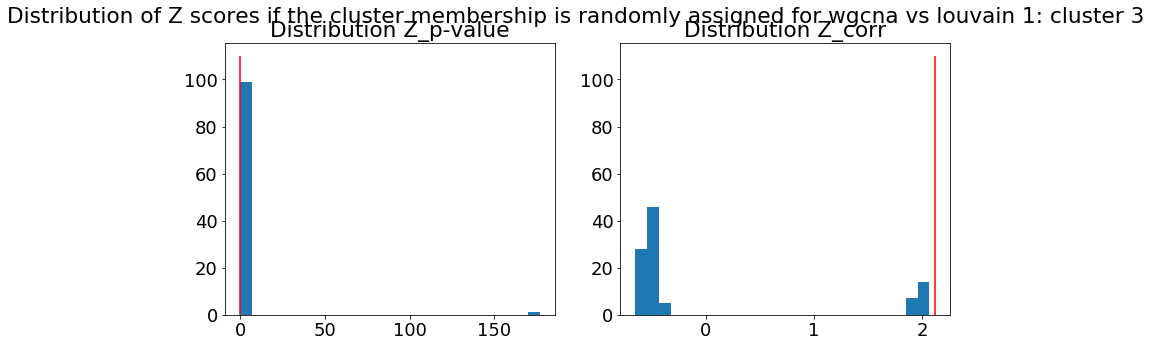

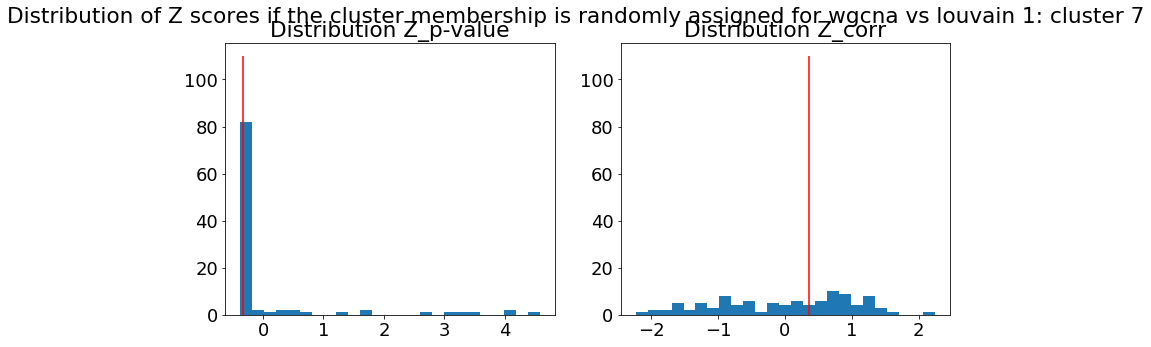

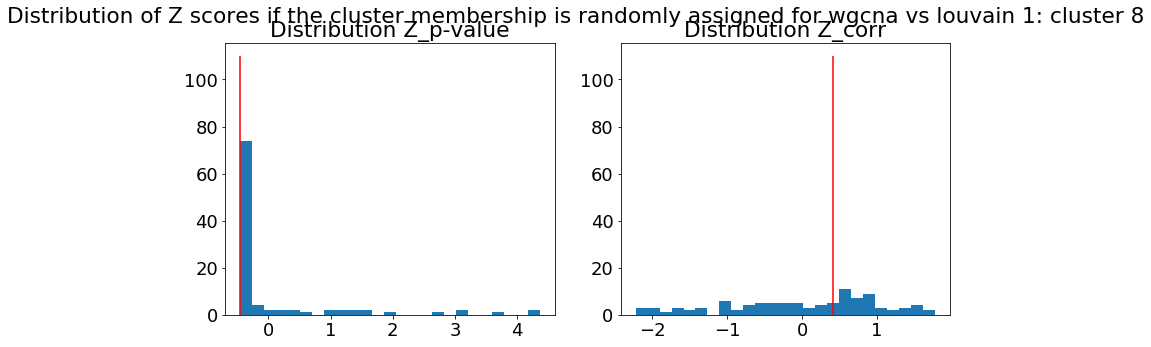

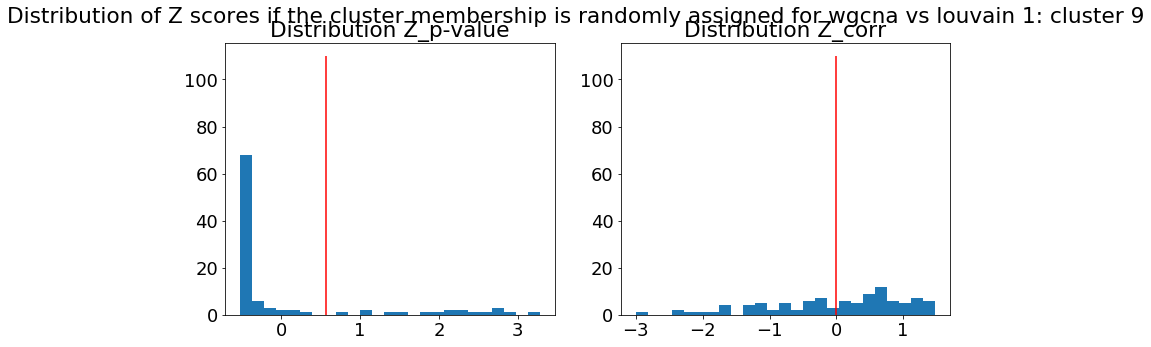

In [11]:
start = time.time()
for cluster in comm_df1.louvain_label.unique():
    plot_random_vs_actual_z(wgcna_modules, comm_df1, cluster_pair_wgcna_n_com1[cluster], cluster, 'louvain_label', network_cluster_stability1, 'wgcna vs louvain 1')
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')

## Evaluation 1.3: how do % DE in each community change when community assingment changes?

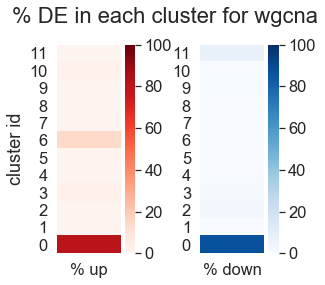

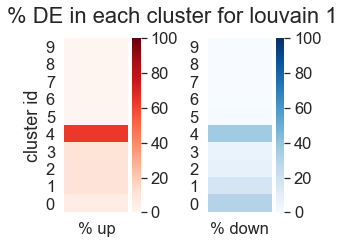

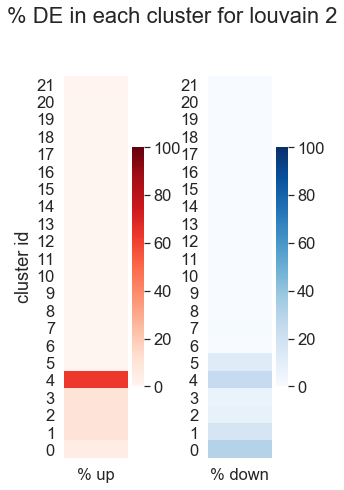

In [12]:
for i, cluster_df in enumerate(comm_dfs):
    cluster_DE_perc(cluster_df, 'louvain_label', comm_names[i])

## Evaluation 1.4: how do % of significant genes change when community assingment changes (This process takes >10 min to run)

time delta: 1606963026.582005 seconds


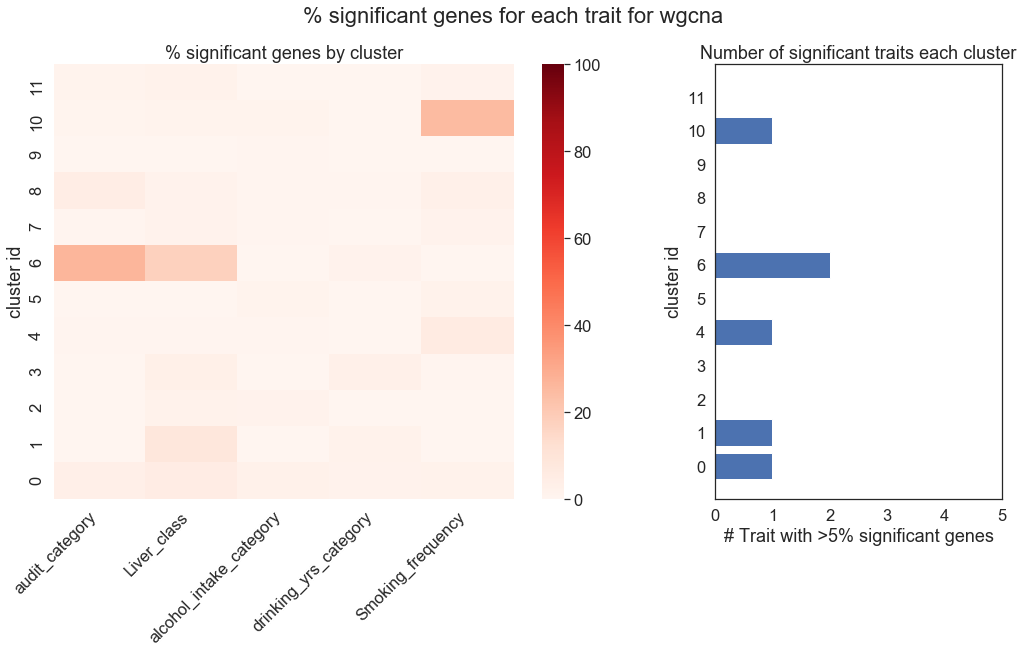

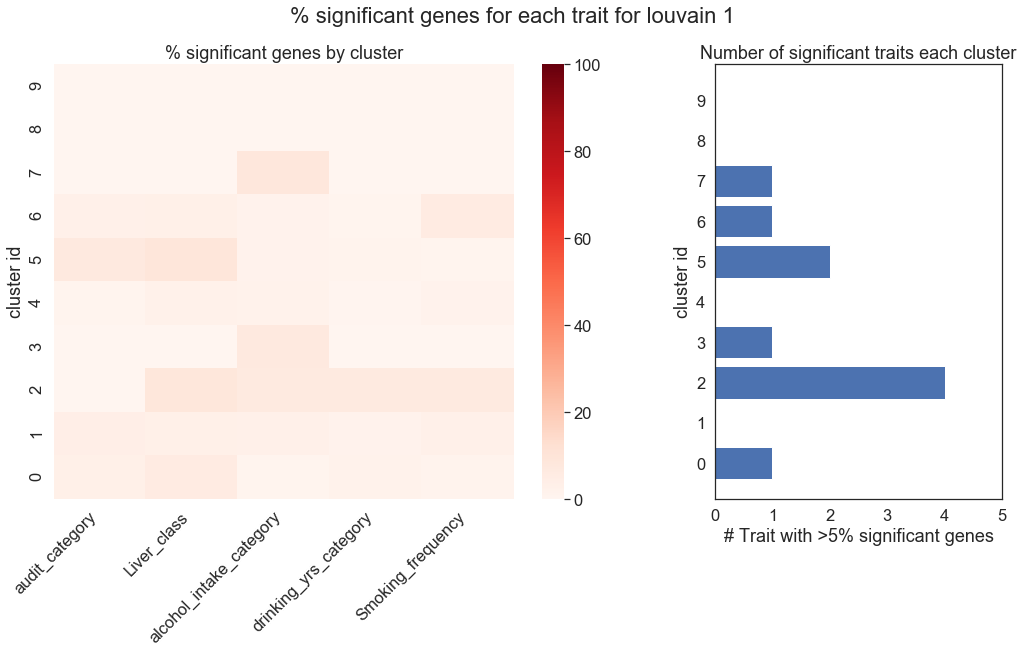

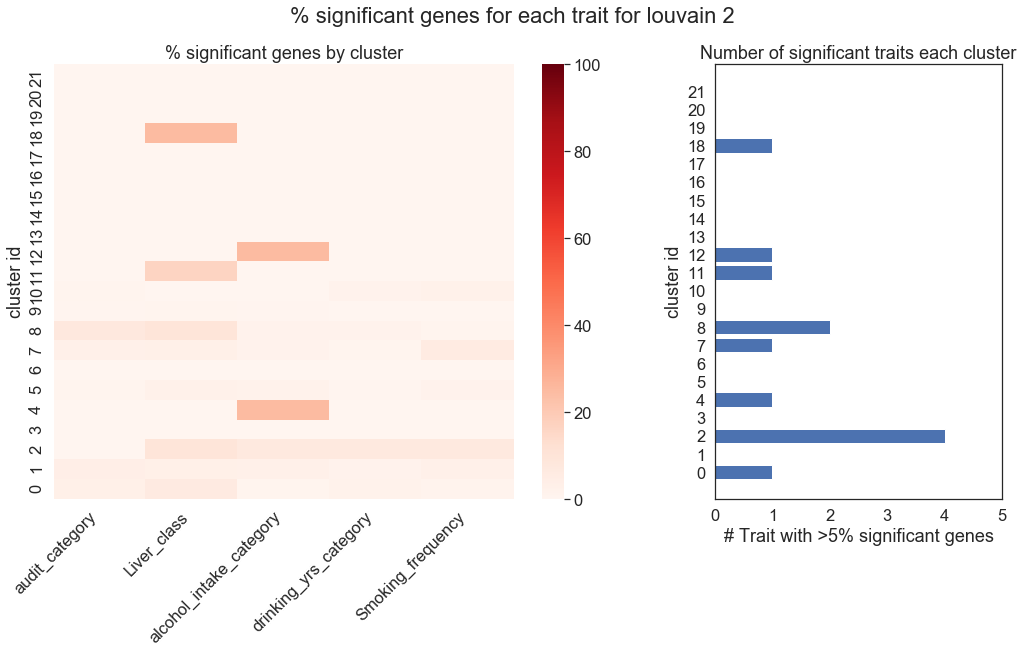

In [13]:
start = time.time()
cluster_df_names = ['wgcna','louvain 1', 'louvain 2']
for i, cluster_df in enumerate([wgcna_modules,comm_df1, comm_df2]):
    plot_sig_perc(cluster_df, 'louvain_label', cluster_df_names[i])
end = time.time()
print(f'time delta: {end} seconds')

## Evaluation 1.5: how do trait and community correlation change when community assignment change

time delta: 11.027969121932983 seconds


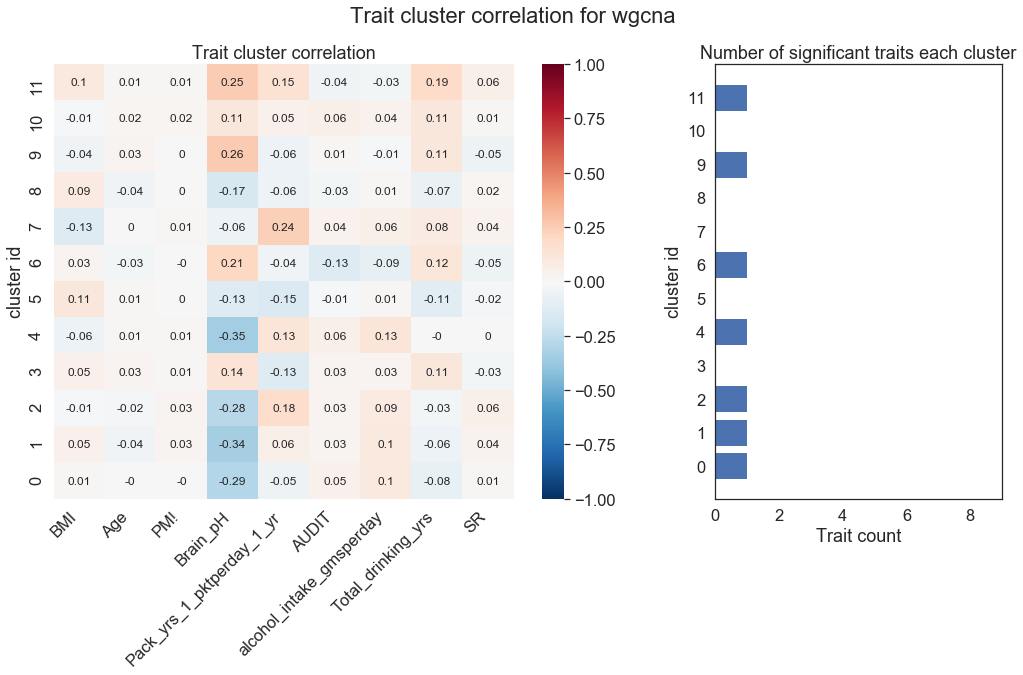

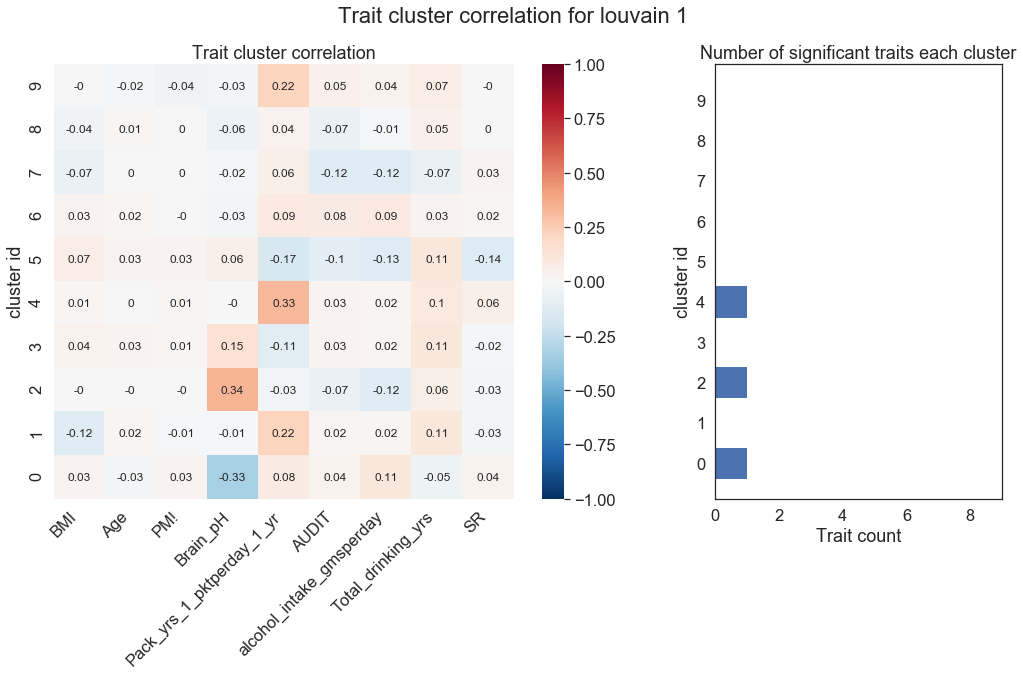

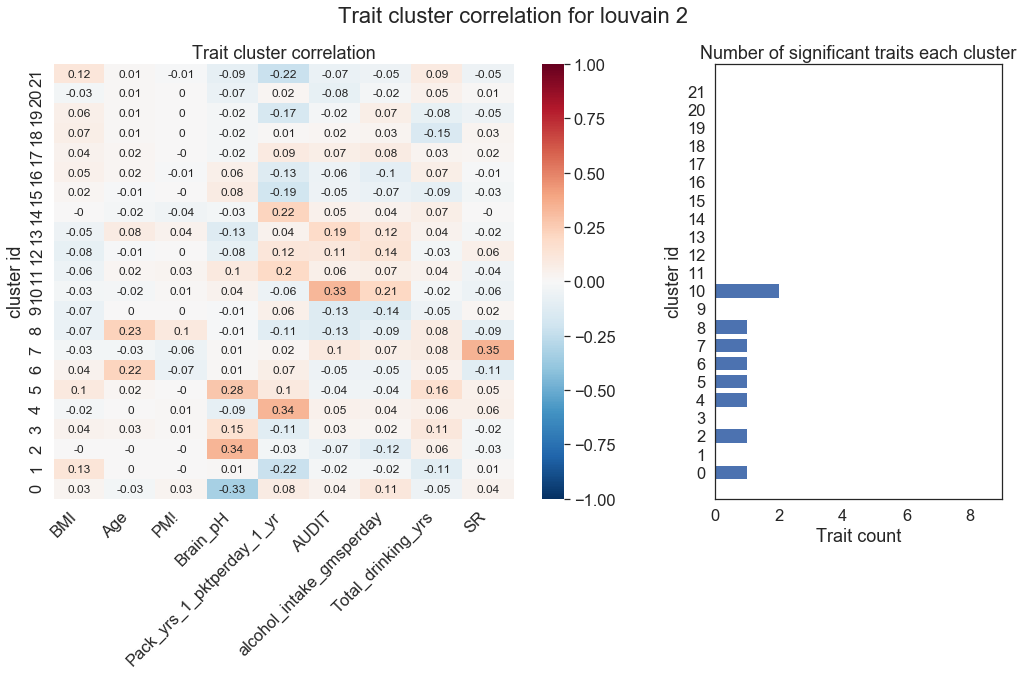

In [14]:
start = time.time()
cluster_df_names = ['wgcna','louvain 1', 'louvain 2']
for i, cluster_df in enumerate([wgcna_modules,comm_df1, comm_df2]):
    cluster_phenotype_corr(cluster_df, 'louvain_label', cluster_df_names[i])
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')

# Evaluation 2: Evaluate subnetwork quality by comparing to the whole network

## Evaluation 2.1: does the scale-free network assumption still hold in the subnetwork?

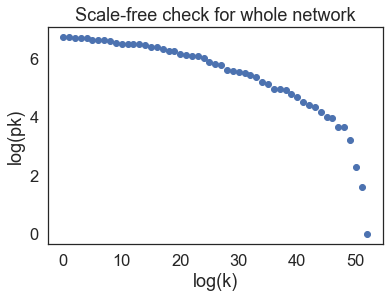

In [15]:
# Original network with no cutoff
scale_free_validate(tom_df, 'whole network')

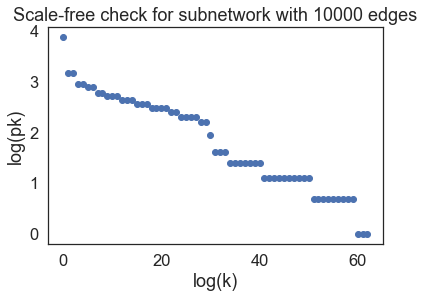

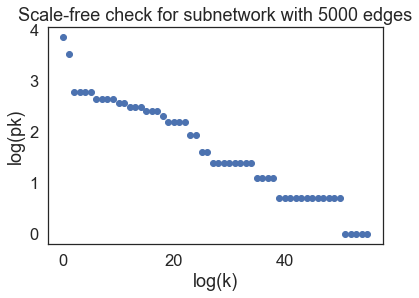

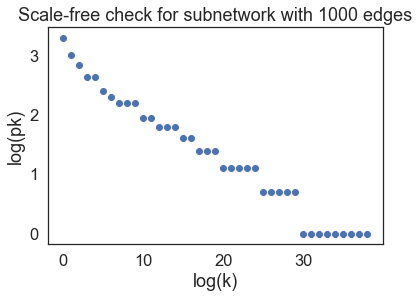

time delta: 87.76113510131836 seconds


In [16]:
start = time.time()
subset_networks = []
for edge in [10000,5000,1000]:
    subset, G = subset_network(tom_df, 0.21, 0.99, edge)
    subset_networks.append(subset) 
    scale_free_validate(subset, f'subnetwork with {edge} edges')
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')

## Evaluation 2.2: compare network distance by GED and deltacon

### Note to use DeltaCon, the graphs need to have the same number of nodes so use subnetwork without removing the nodes with degree = 0

In [17]:
start = time.time()
subset_networks2 = []
subset_G = []
for weight in [0.218, 0.24, 0.278]:
    subset, G = subset_network(tom_df, weight, 0.98)
    subset_networks2.append(subset)
    subset_G.append(G)
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')

Number of edges left: 10100.0
Number of edges left: 4967.0
Number of edges left: 1092.0
time delta: 132.30045986175537 seconds


time delta: 682.1064140796661 seconds


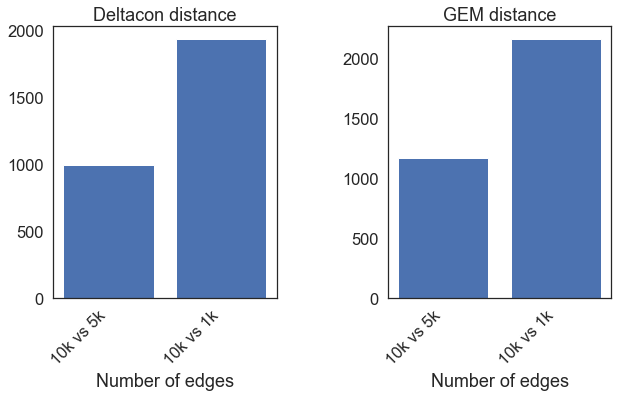

In [18]:
start = time.time()
plot_graph_distance(subset_networks2, ['10k', '5k', '1k'])
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')

# Evaluation 3: compare subnetworks by their communities

## Evaluation 3.1: compare subnetwork similarities

### Evaluation 3.1a: comparison by jaccard

In [19]:
start = time.time()
subset_communities = []
for subset in subset_networks:
    subset_communities.append(run_louvain(subset))
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')

time delta: 0.05739188194274902 seconds


time delta: 1.8093619346618652 seconds


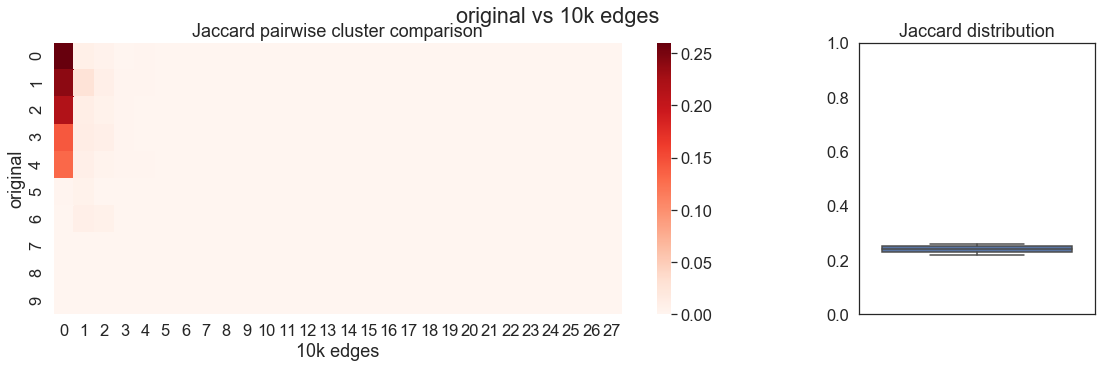

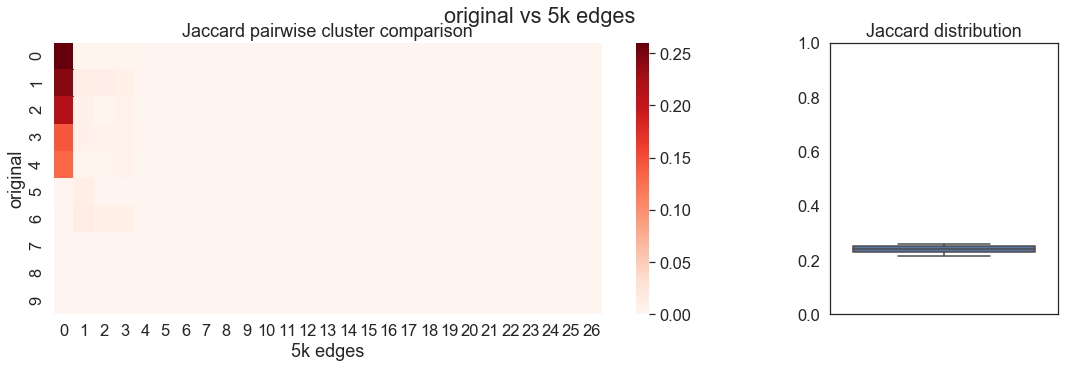

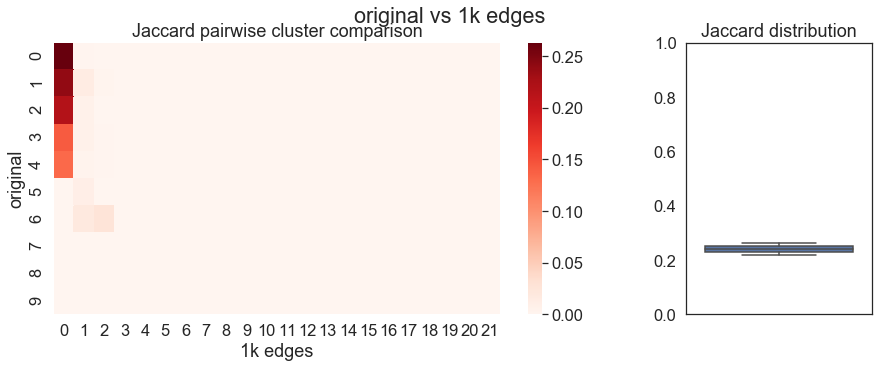

In [20]:
start = time.time()
subset_names = ['10k edges', '5k edges', '1k edges']
for i, subset_com in enumerate(subset_communities):
    cluster_jaccard(comm_df1, subset_com, 'louvain_label', ['original', subset_names[i]], cutout_nodes = False, top=3)
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')

### Evaluation 3.1b: comparison by jaccard (nodes with degree = 0 excluded)

time delta: 1.4920568466186523 seconds


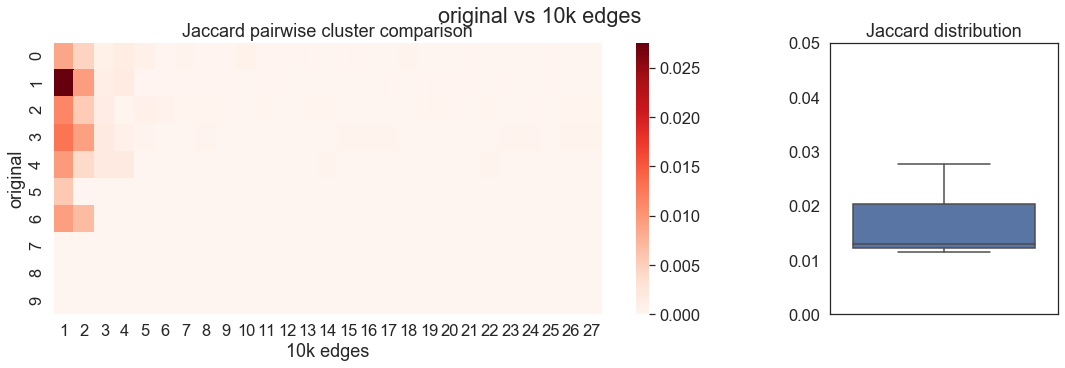

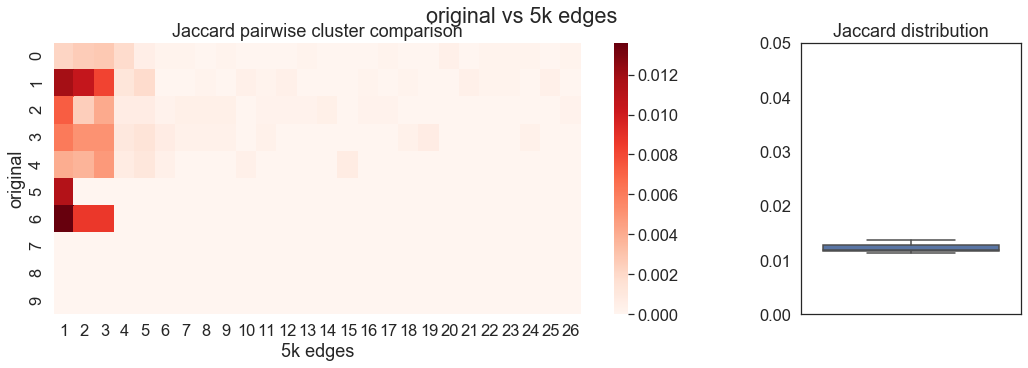

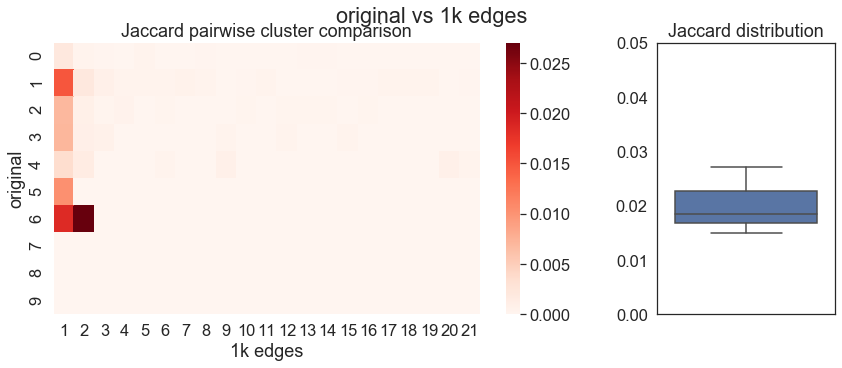

In [21]:
start = time.time()
for i, subset_com in enumerate(subset_communities):
    cluster_jaccard(comm_df1, subset_com, 'louvain_label', ['original', subset_names[i]], cutout_nodes = True, top=3, y_max = 0.05)
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')

### Evaluation 3.1c: comparison of subnetwork by normalized mutual information

time delta: 0.030317068099975586 seconds


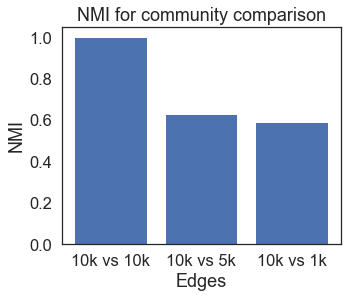

In [22]:
start = time.time()
plot_cluster_nmi_comparison(subset_communities[0], subset_communities, 
                            'louvain_label', ['10k vs 10k', '10k vs 5k', '10k vs 1k'])
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')

time delta: 0.056825876235961914 seconds


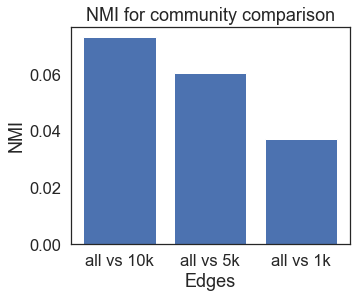

In [23]:
start = time.time()
plot_cluster_nmi_comparison(comm_df1, subset_communities, 
                            'louvain_label', ['all vs 10k', 'all vs 5k', 'all vs 1k'])
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')

## Evaluation 3.2: how do the subnetwork communities compare to the whole network in terms of correlation with the alcohol phenotypes?

### Evaluation 3.2a: compare whole network and subnetwork communities by % DE in each community

time delta: 4.95925498008728 seconds


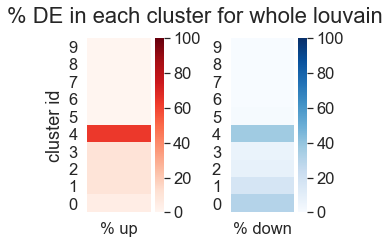

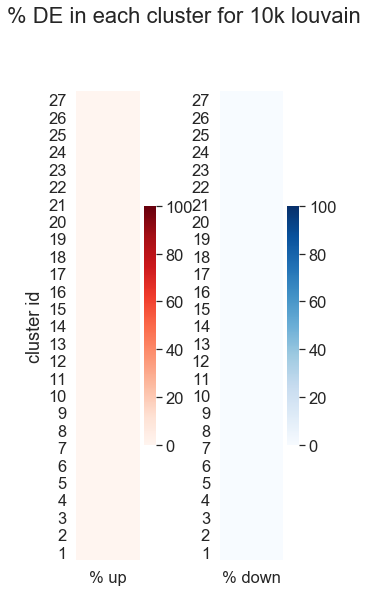

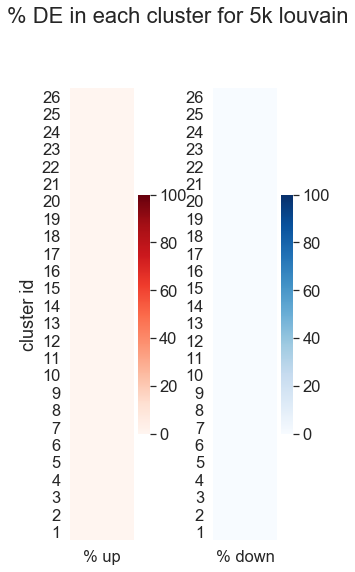

In [24]:
start = time.time()
subset_names = ['whole louvain','10k louvain','5k louvain']
for i, cluster_df in enumerate([comm_df1, subset_communities[0], subset_communities[1]]):
    cluster_DE_perc(cluster_df, 'louvain_label', subset_names[i])
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')

### Evaluation 3.2b: compare whole network and subnetwork communities by % significant genes in each cluster

time delta: 319.02899193763733 seconds


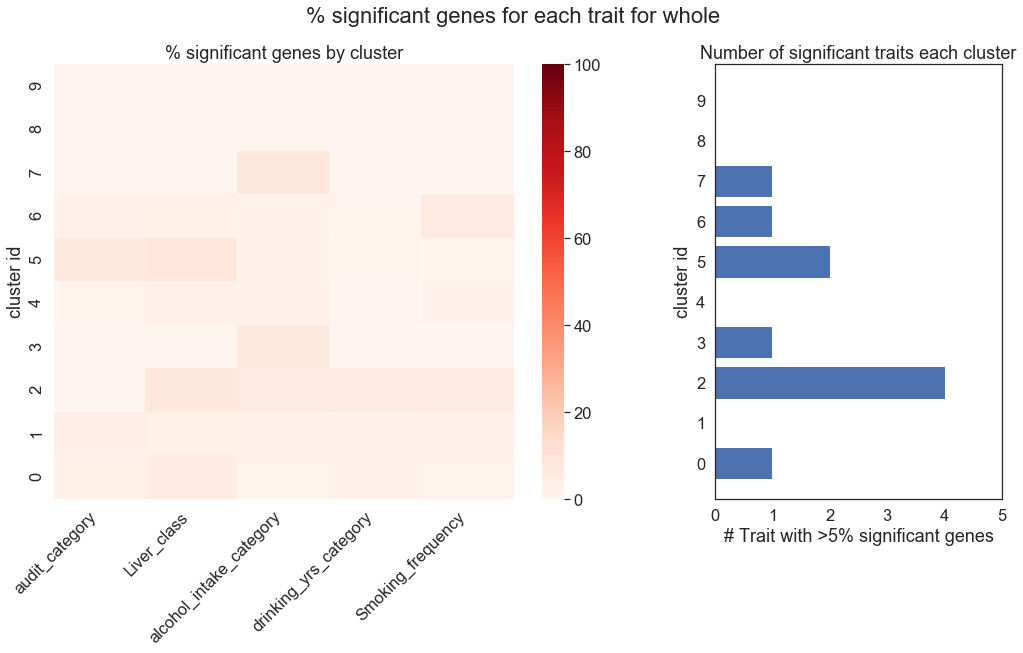

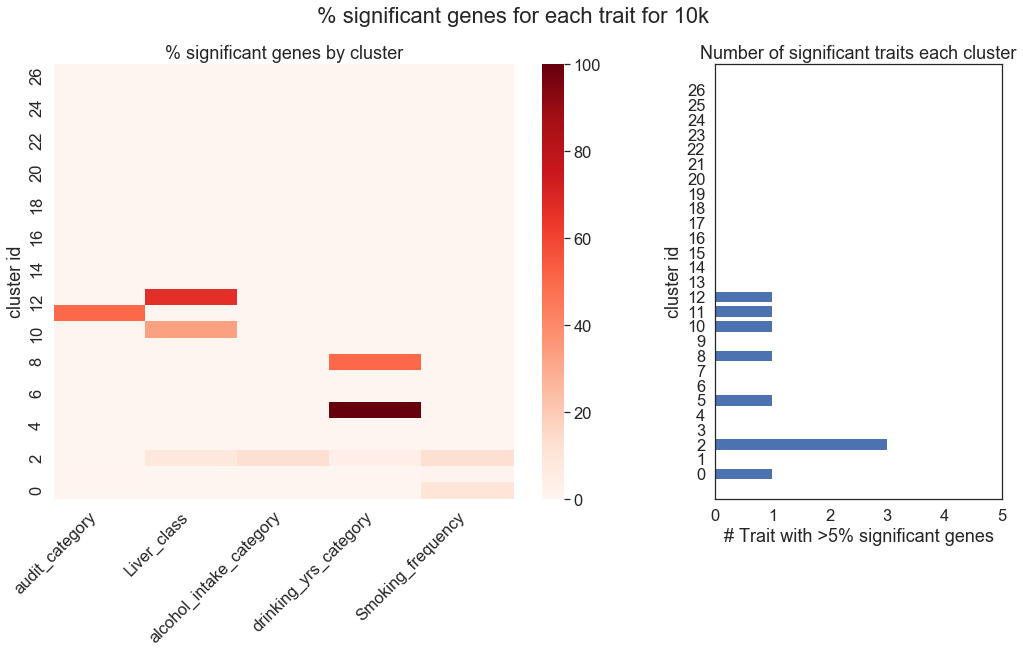

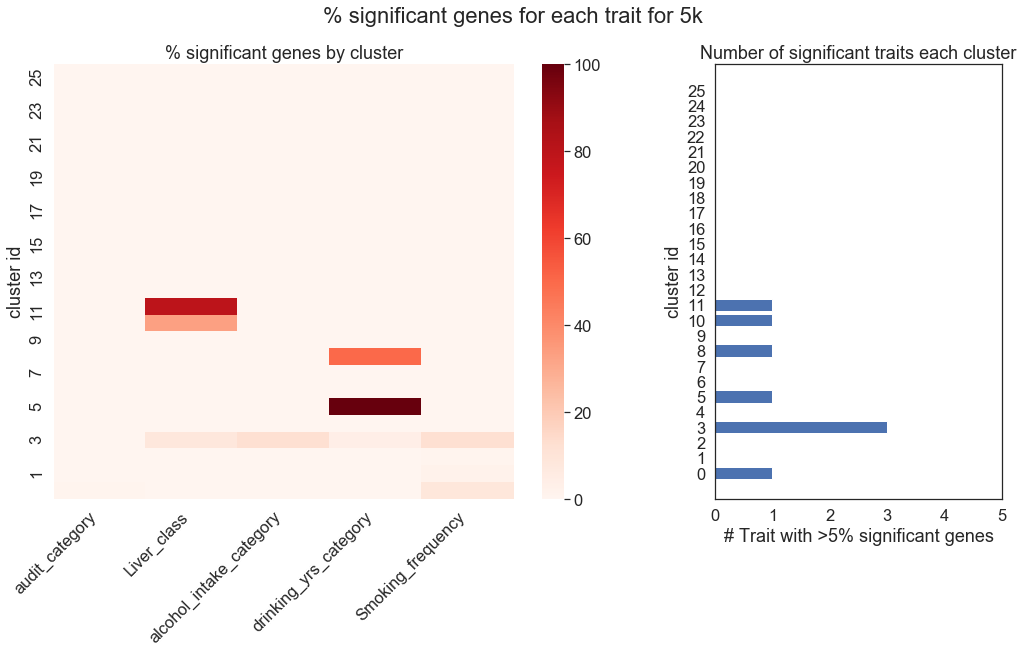

In [25]:
start = time.time()
subset_names = ['whole','10k','5k']
for i, cluster_df in enumerate([comm_df1,subset_communities[0], subset_communities[1]]):
    plot_sig_perc(cluster_df, 'louvain_label', subset_names[i])
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')

### Evaluation 3.2c: compare whole network and subnetwork communities by cluster and trait correlation

time delta: 5.294800043106079 seconds


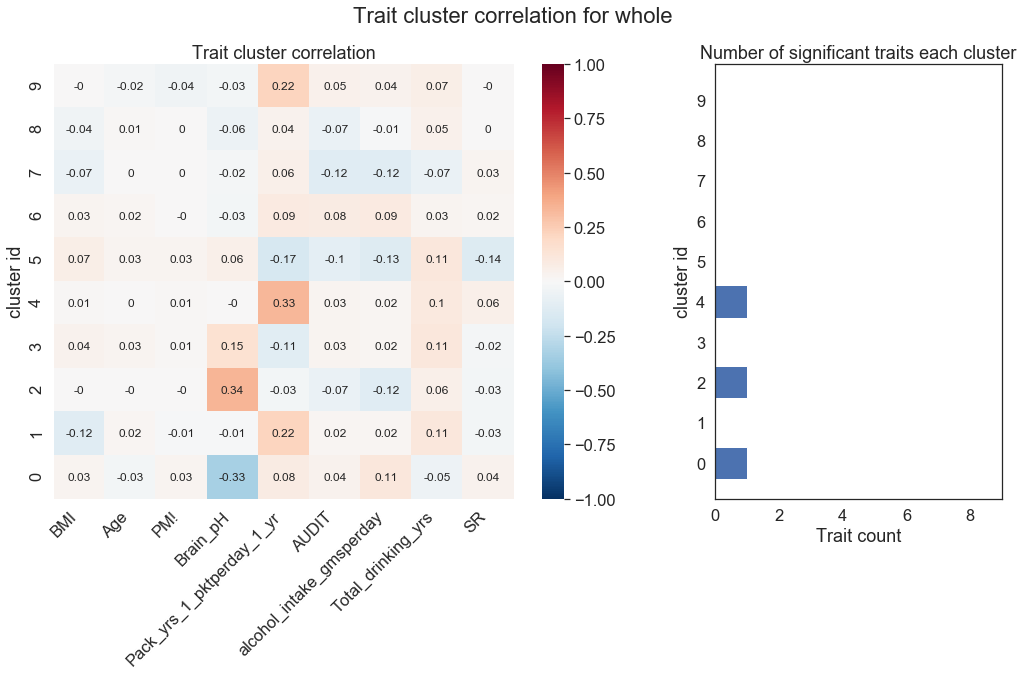

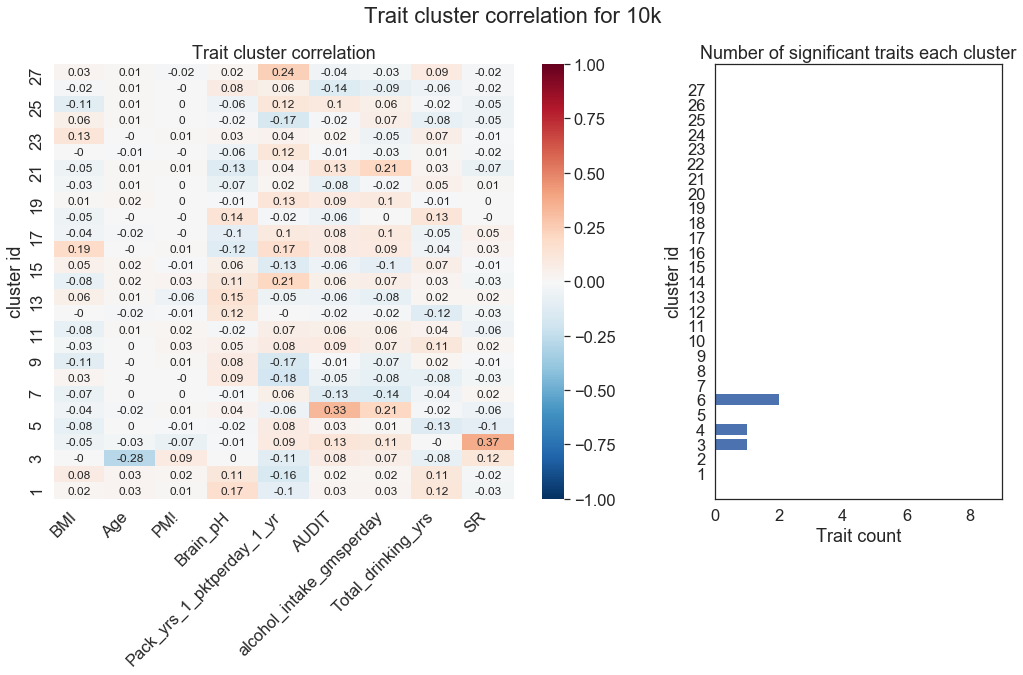

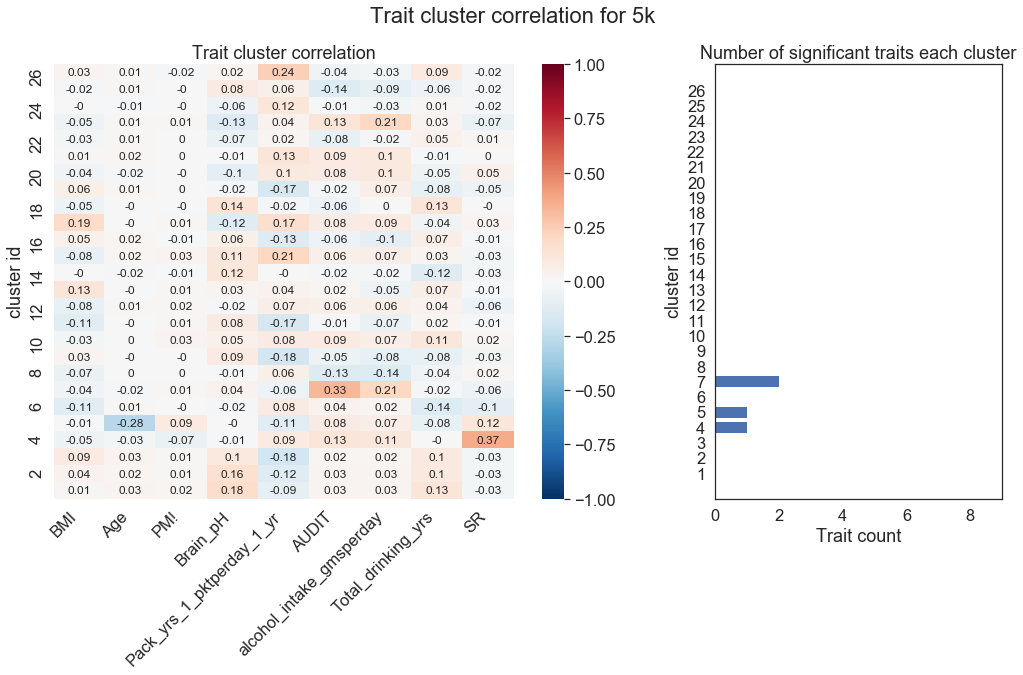

In [26]:
start = time.time()
for i, cluster_df in enumerate([comm_df1,subset_communities[0], subset_communities[1]]):
    cluster_phenotype_corr(cluster_df, 'louvain_label', subset_names[i])
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')